In [10]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import cv2

In [2]:
import os

In [3]:
from fastai.vision import *
from fastai.metrics import error_rate

In [4]:
#root_dir = '/home/uid38717/Documents/Waste-Classifier'
root_dir = r'D:\2019\Waste-Classifier'
data_dir = 'dataset-resized'
data_path = os.path.join(root_dir,data_dir)
data_categories = os.listdir(data_path)
print(data_categories)
#num_waste_cat = len()
len(data_categories)

['.DS_Store', 'cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


7

In [5]:
data_categories.remove('.DS_Store')
print(data_categories)

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


In [6]:
fnames = get_image_files(data_path+'/metal')
fnames[:5]

[WindowsPath('D:/2019/Waste-Classifier/dataset-resized/metal/metal1.jpg'),
 WindowsPath('D:/2019/Waste-Classifier/dataset-resized/metal/metal10.jpg'),
 WindowsPath('D:/2019/Waste-Classifier/dataset-resized/metal/metal100.jpg'),
 WindowsPath('D:/2019/Waste-Classifier/dataset-resized/metal/metal101.jpg'),
 WindowsPath('D:/2019/Waste-Classifier/dataset-resized/metal/metal102.jpg')]

In [20]:
size = 224
bs = 64

In [21]:
data = ImageDataBunch.from_folder(data_path, 
                                  ds_tfms=get_transforms(do_flip=True, flip_vert=True),
                                  valid_pct=0.2, 
                                  size=size, 
                                  bs=bs)

In [22]:
data.normalize(imagenet_stats)


ImageDataBunch;

Train: LabelList (2022 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
cardboard,cardboard,cardboard,cardboard,cardboard
Path: D:\2019\Waste-Classifier\dataset-resized;

Valid: LabelList (505 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
cardboard,glass,metal,plastic,paper
Path: D:\2019\Waste-Classifier\dataset-resized;

Test: None

In [24]:
learner = cnn_learner(data, models.resnet18, metrics=[accuracy], callback_fns=ShowGraph)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


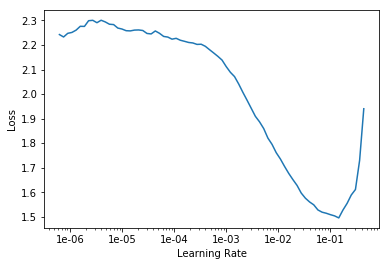

In [25]:
learner.lr_find()
learner.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,1.197726,0.705627,0.742574,13:47
1,0.835780,0.736565,0.770297,13:48
2,0.670541,0.549234,0.825743,14:34


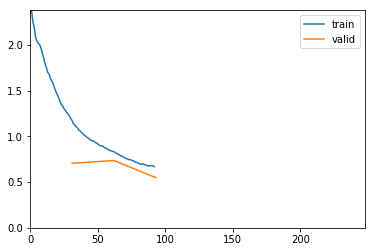

KeyboardInterrupt: 

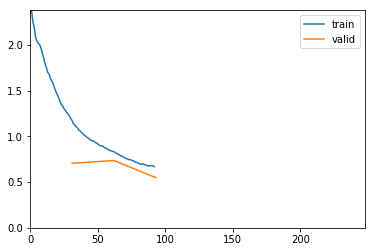

In [26]:
learner.fit_one_cycle(8, max_lr=slice(1e-3, 1e-2))

In [ ]:
interpreter = ClassificationInterpretation.from_learner(learner)
interpreter.most_confused(min_val=2)

In [23]:
#tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(data_path+'/trash', size=26)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [27]:
data_paths = [data_path+'/'+name for name in data_categories]; data_paths

['/home/uid38717/Documents/Waste-Classifier/dataset-resized/metal',
 '/home/uid38717/Documents/Waste-Classifier/dataset-resized/cardboard',
 '/home/uid38717/Documents/Waste-Classifier/dataset-resized/trash',
 '/home/uid38717/Documents/Waste-Classifier/dataset-resized/glass',
 '/home/uid38717/Documents/Waste-Classifier/dataset-resized/paper',
 '/home/uid38717/Documents/Waste-Classifier/dataset-resized/plastic']

In [ ]:
file_paths = [path/name for name in df['name']]; fn_paths[:2]

In [33]:
file_paths = [get_image_files(data_path) for data_path in data_paths];
len(file_paths)

In [44]:
file_paths = []
for data_path in data_paths:
    file_paths+= get_image_files(data_path)
len(file_paths)
file_paths[:5]

[PosixPath('/home/uid38717/Documents/Waste-Classifier/dataset-resized/metal/metal107.jpg'),
 PosixPath('/home/uid38717/Documents/Waste-Classifier/dataset-resized/metal/metal312.jpg'),
 PosixPath('/home/uid38717/Documents/Waste-Classifier/dataset-resized/metal/metal52.jpg'),
 PosixPath('/home/uid38717/Documents/Waste-Classifier/dataset-resized/metal/metal402.jpg'),
 PosixPath('/home/uid38717/Documents/Waste-Classifier/dataset-resized/metal/metal392.jpg')]

In [41]:
ff='/home/uid38717/Documents/Waste-Classifier/dataset-resized/metal'
ff.split('/')

['',
 'home',
 'uid38717',
 'Documents',
 'Waste-Classifier',
 'dataset-resized',
 'metal']

In [43]:
labels=[]
for x in file_paths:
    labels.append(x.split('/')[6])
labels[:5]

AttributeError: 'PosixPath' object has no attribute 'split'

In [28]:
data = ImageDataBunch.from_lists(data_paths,ds_tfms=tfms, size=24)
data.classes

TypeError: from_lists() missing 2 required positional arguments: 'fnames' and 'labels'

IndexError: index 0 is out of bounds for axis 0 with size 0